# **Wine Quality:** Regression & Classification

**Source Link:** [Wine Quality Data](https://archive.ics.uci.edu/dataset/186/wine+quality)


---

**Authors:**
1. Adam
2. Garrett
3. Ian


**Date:** April 11, 2024

---



# **Setup:**
### **Libraries**:




In [ ]:
#pip install seaborn pandas numpy matplotlib scikit-learn mlxtend statsmodels scipy geopandas regex

In [1]:
%%capture

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
#from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp ##############
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegressionCV
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.preprocessing import scale
import scipy.stats as ss
import math
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
import seaborn as sns
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
import regex as re
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model as lm

### **Import Dataset**:

In [2]:
# the values are separated by ";", use this as delimiter
red = pd.read_csv("winequality-red.csv", delimiter = ";")
white = pd.read_csv("winequality-white.csv", delimiter = ";")

---

# **Purpose**:

## **Research Question**:
Through conducting our analysis, we aim to develop intricate models that are equally, or more accurate than a sommelier’s ability to classify and identify a wine’s type. The models which we develop may provide an interpretive reasoning to the classification process that doesn’t require years of wine tasting and completion of a professional sommelier program. In this comprehensive report, we delve into an in-depth analysis of the two predominant types of wine: red and white. We meticulously examine their unique characteristics, utilizing these attributes not only to predict the classification of an unfamiliar wine but also to draw inferences about their influence on the overall quality. Simply put, our objective is as follows:


***To contruct and refine statistical models which are trained using the chemical compositions of wine, including, but not limited to pH, alcohol, and citric acid. These models will serve two purposes; they allow us to predict the type of an unidentified wine with accuracy, while enabling us to understand how these components influence the wine's overall quality.***



---



# **Dataset Description:**

## **Source and Summary:**
The *Wine Quality* dataset was sourced from the UC Irvine Machine Learning Repository, created by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. This data respresents the comprehensive grading process which experts conducted on red and white variants of Vinho Verde. These grades are stored as *quality* scores ranging from 1 to 10, where the higher score indicates a better quality. Alongside these scores are the measurements of the various components within the wine, described below. The data is divided into two tables, for the respective wine types. The two datasets have the same 11 features yet a largely different number of observations. Since there are only 2 classes, red and white, the daataset exhibits a binary classification problem. The imbalance between classes may impact our classifications models but we will give our best effort to mitigate this effect. Also, the measurements of the features are in different units, so it is crucial to scale these values when working with non-scale-invariant algorithms like LASSO. Finally, the occurence and abundance of some features are likely correlated so to reduce these effects, it is ideal to perform subset selection.




## **About Wine Types:**

Within the wine industry there are countless unique wines, each offering their own distinct taste, color, and aroma among many other features.  These features are fine-tuned throughout the production process with varying chemical concentrations of alcohol, citric acid, and sulphates to name a few.  This process is extremely precise where the combination of these chemicals is essential in the classification and prediction process to determine the wine type and its quality. Many types of wine exist but the most popular are: red, white, rose, and pinot noir. The main difference between red, white, and other types of wines is primarily a result of the type of grape used, the inclusion of grape skins, fermentation, and aging. Using the chemical make-up of a wine, wine experts are able to accurately identify the type and country of origin of the bottle as well as its overall quality and market value. The dataset exclusively pertains to information about red and white variants of the Portuguese "Vinho Verde" wine.



## **Red**: Data on Red Wine
*Shape: (1599, 12)* ; *Null Values: None*
1. **fixed acidity (float64)**: set of a wine's natural acids, usually measured in in grams of tartaric acid per litre.
2. **volatile acidity (float64)**: a measure of the steam distillable fatty acids in the wine (g/L)
3. **citric acid (float64)**: the amount of citric acid in the wine (g/L)
4. **residual sugar (float64)**: the amount of natural sugar left over in the wine from the fermented grapes (g/L)
5. **chlorides (float64)**: the amount of ionized chlorine particles present in the wine, indicative of the amount pf sodium chloride in the wine (g/L)
6. **free sulfur dioxide (float64**): sulfur dioxide that is present in wine but has not yet reacted, and is still available to preserve the wine (ppm)
7. **total sulfur dioxide (float64**): the amount of reacted and non-reacted (i.e. free) sulfur dioxide present in the wine (ppm)
8. **density (float64)**: the mass per unit volume of wine at 20°C (g/L)
9. **pH (object)**: a measure of how strong the acids are in comparison to all of the other compounds in a wine, usually ranging from 2.9 to 4.2 in wine
10. **sulphates (float64)**: amount of sulphates present in the wine (ppm)
11. **alcohol (float64)**: the amount of alcohol present in the wine (%)
12. **quality: (int64)**: quality score on a scale from 0 to 10

## **White**: Data on White Wine
*Shape: (4898, 12)* ; *Null Values: None*
1. **fixed acidity (float64)**: set of a wine's natural acids, usually measured in in grams of tartaric acid per litre.
2. **volatile acidity (float64)**: a measure of the steam distillable fatty acids in the wine (g/L)
3. **citric acid (float64)**: the amount of citric acid in the wine (g/L)
4. **residual sugar (float64)**: the amount of natural sugar left over in the wine from the fermented grapes (g/L)
5. **chlorides (float64)**: the amount of ionized chlorine particles present in the wine, indicative of the amount pf sodium chloride in the wine (g/L)
6. **free sulfur dioxide (float64**): sulfur dioxide that is present in wine but has not yet reacted, and is still available to preserve the wine (ppm)
7. **total sulfur dioxide (float64**): the amount of reacted and non-reacted (i.e. free) sulfur dioxide present in the wine (ppm)
8. **density (float64)**: the mass per unit volume of wine at 20°C (g/L)
9. **pH (object)**: a measure of how strong the acids are in comparison to all of the other compounds in a wine, usually ranging from 2.9 to 4.2 in wine
10. **sulphates (float64)**: amount of sulphates present in the wine (ppm)
11. **alcohol (float64)**: the amount of alcohol present in the wine (%)
12. **quality: (int64)**: quality score on a scale from 0 to 10



In [3]:
%%capture
print(red.shape) # (1599, 13)
print(white.shape) # (4898, 13)

red.info()
white.info()

red.head(5)
white.head(5)

---

# **Data Cleaning & Preparation**:
Modifying our orignial datasets to enhance and strengthen our findings. Upon download, the dataset was already in a well-prepared format for analysis. As a result, there is no need to handle missing values or modify the column names or type. Although, due to the divided nature of the data, it is crucial to introduce new features and concatenate the tables together.To prepare the data  model building, we must create training and test sets and scale the features.

## **Merging**:
Since the wine types are stored within different datasets, it is crucial to join them together in order to conduct our analysis. Prior to merging, we must add an identifier column to indicate the wine type, either red or white.

In [4]:
%%capture
# add wine type column
red["wine type"] = "red"
white["wine type"] = "white"

# concatenate the tables
wine = pd.concat([red,white])
wine["wine type"] = wine["wine type"].astype("category")

wine.head(5)

## **Training & Test Sets**:
In order to train our models we split our data in a training and set set, using a 70:30 split; 70% of the original data is sampled within the training data while to rest is stored as the test set. This allows us to perform cross-validation and evaluate how a model will perform on unseen validation data, allowing us to tune the model to perform better on the test data.

In [5]:
np.random.seed(1)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(wine.iloc[:,0:11], wine.loc[:,"wine type"], test_size = 0.30)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(wine.iloc[:,0:11], wine.loc[:,"quality"], test_size = 0.30)

## **Scaling**:
In order to make use of non-scale-invariant algorithms, it is essential to first scale our data. This is achieved by using StandardScaler() which calcualtes the mean and standard deviation of the variables within the training set and using these to normalize both the training and test data.  

In [6]:
# scale the data
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# put them back into dataframes
X_train_class_scaled = pd.DataFrame(X_train_class_scaled, columns = X_train_class.columns, index = X_train_class.index)
X_test_class_scaled = pd.DataFrame(X_test_class_scaled, columns = X_test_class.columns, index = X_test_class.index)

X_train_reg_scaled = pd.DataFrame(X_train_reg_scaled, columns = X_train_reg.columns, index = X_train_reg.index)
X_test_reg_scaled = pd.DataFrame(X_test_reg_scaled, columns = X_test_reg.columns, index = X_test_reg.index)

# don't scale response variables since it would impact interpretation



---



# **Exploratory Data Analysis**:



## **Correlation**:
Prior to building any model, it is essential to observe the correlation between predictors and determine the necessary steps to mitigate the effects of multicollinearity. In our analysis, we will apply regularization techniques like LASSO and PCA to reduce these effects. Examining the correlation matrix below, many of the correlations are moderate with the exception between density and alcohol being -0.68. These correlations aren't too large and shouldn't cause issues in our process; nevertheless, we will continue with dimension reduction to simplify the data and increase interpretability.

<Axes: >

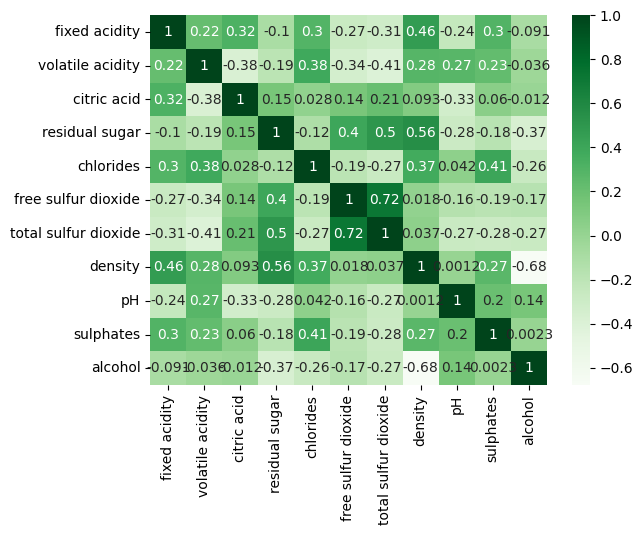

In [7]:
matrix = X_train_class_scaled.corr()

#plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

## **Domain Exploration**:
Prior to continuing onto the next step of the analysis, we must understand how our variables are distributed, especially those of interest. This will primarily done using histograms.

### **Findings**:
#### **Quality**:
The qualities have a skew value of 0.1896 and are thus slightly positively skewed, but from the plot below, the values are approximately normally distributed with median 6. There is a slight concern with the number of observations related to each of these quality scores; since there are so few observations with a quality of "9" and "3", the models we construct may have difficulties predicting these values. On the otherhand, many observations have scores of "6" and "5", giving our models more information to build their predictions off of. So to summarize, the imbalance of the response variables may impact the model's accuracy. On a positive note, the distribution of the training and test set similarly resemble that of the entire dataset.

**Value Counts**:
1. Quality of 6: 2836
2. Quality of 5: 2138
3. Quality of 7: 1079
4. Quality of 4: 216
5. Quality of 8: 193
6. Quality of 3: 30
7. Quality of 9: 5




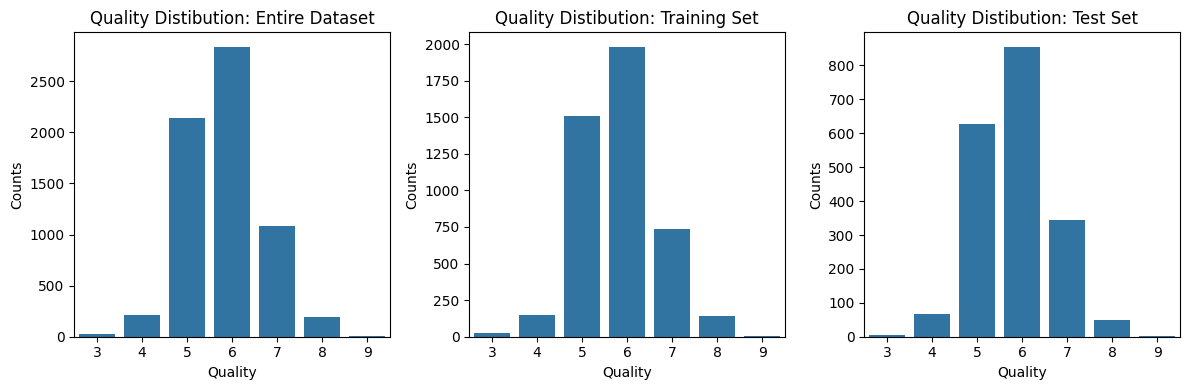

In [8]:
# quality: distribution
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(x='quality', data=wine, ax=axes[0])
axes[0].set_ylabel("Counts")
axes[0].set_xlabel("Quality")
axes[0].set_title("Quality Distibution: Entire Dataset")

sns.countplot(x='quality', data=pd.DataFrame(y_train_reg), ax=axes[1])
axes[1].set_ylabel("Counts")
axes[1].set_xlabel("Quality")
axes[1].set_title("Quality Distibution: Training Set")

sns.countplot(x='quality', data=pd.DataFrame(y_test_reg), ax=axes[2])
axes[2].set_ylabel("Counts")
axes[2].set_xlabel("Quality")
axes[2].set_title("Quality Distibution: Test Set")

plt.tight_layout() # this is so the plots don't overlap
plt.show()

#### **Wine Type**:
When analyzing the distribution of Wine Type, we also found that there was a large imbalance between the classes. Although, unlike the previous case, these classes have substantial observations and provide sufficient information required for our models. Despite this, we would still prefer these to be evenly distributed since there is possibility that the majority class (white wine) could dominate the majority class (red wine) and lead to misclassifications. To reduce these effects we will implement ensemble models and metrics like ROC that are less sensitive to imbalance.

**Value Counts**:
1. white wine: 4898
2. red wine: 1599

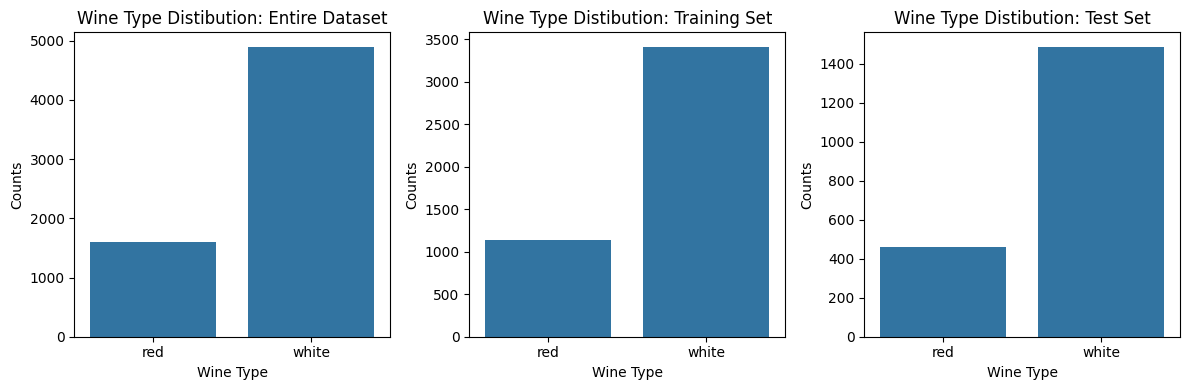

In [9]:
# wine type: distribution
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(x='wine type', data=wine, ax=axes[0])
axes[0].set_ylabel("Counts")
axes[0].set_xlabel("Wine Type")
axes[0].set_title("Wine Type Distibution: Entire Dataset")

sns.countplot(x='wine type', data=pd.DataFrame(y_train_class), ax=axes[1])
axes[1].set_ylabel("Counts")
axes[1].set_xlabel("Wine Type")
axes[1].set_title("Wine Type Distibution: Training Set")

sns.countplot(x='wine type', data=pd.DataFrame(y_test_class), ax=axes[2])
axes[2].set_ylabel("Counts")
axes[2].set_xlabel("Wine Type")
axes[2].set_title("Wine Type Distibution: Test Set")

plt.tight_layout() # this is so the plots don't overlap
plt.show()

# print(wine.quality.value_counts())
# wine.quality.skew()
# wine.quality.median()
# print(wine["wine type"].value_counts())

#### **Overall Summary**:
To gain a thorough insight into the specific distributions of each type of wine, we individually plot their distributions, differentiated by various colors. While the distributions between the two types of wines show some similarities, a notable difference is observed in the count of wines with a quality score of 6. In the case of white wine, wines with a rating of 6 are most prevalent, significantly outnumbering the next most common quality score of 5. However, this pattern does not hold for the distribution of red wines. Here, the counts for quality scores 5 and 6 are much closer, with 5 having the slight edge.

<Axes: title={'center': 'Quality Distribution By Wine Type'}, xlabel='quality', ylabel='count'>

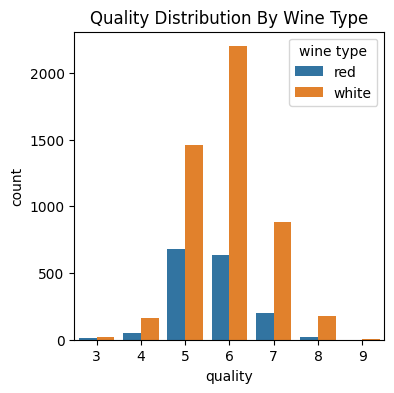

In [10]:
# quality by wine type
fig, axes = plt.subplots(1, figsize=(4, 4))
plt.title("Quality Distribution By Wine Type")
sns.countplot(x='quality', hue = "wine type", data=pd.DataFrame(wine))



---



# **Model Building Procedure**:
Our analysis of the Wine Quality data primarily focuses on predicting wine quality and classifying wine type; in other words, we are tasked with performing regression on continuous data for quality prediction and classification on categorical data for wine type. These approaches are separate and will occur within different sections of the analysis.

We'll first begin with regression, comparing performance between a simple linear model, polynomial model, and a Least Absolute Shrikage and Selection Operator (LASSO) model. During this portion of the analysis, we will include residual plots to validate each model's adequacy while also using metrics like Root Mean Squared Error (RMSE) and R-Squared to compare performances.

Next we'll transition into the classification models, using a wide variety of techniques like logistic regression for binary classification, decision trees, random forests, and support vector machines. There are many metrics within the confusion matrix that can be used to evaluate and compare performances between these models but we'll primarily use "Accuracy" for its overall assessment capabilites.

Included in each section, we incorporate more creative approaches that extend the topics discussed in class by focusing on ensemble learning methods. Ensemble learning is an extremely powerful tool for classification tasks that allows models to work together by using the results of another in order to enhance its performance. To achieve this, we first begin using a form of dimension reduction such as LASSO or principal component analysis (PCA). With the simplified dimension space produced by these algorithms, we can use this new data in union with decision trees, support vector machines, bagging, or even linear / quadratic discriminant analyis.

During the entire process, our attention will be on balancing bias and variance, as well as striking a balance between model interpretability and accuracy. Our goal is to develop models that are both accurate and easy to interpret, thus reducing the need to compromise on either of these crucial aspects.



---



# **Regression**: Wine Quality
In this section we will use linear regression, polynomial regression, ridge regression, lasso regression, bagging, and support vector regression. We attempted to log-transform our scaled data but some values resulted in infinity, making us unable to use this method. To only display relevant output and reduce clutter in the analysis, plots and an in-depth analysis will only be provided for the effective methods. These models aim to develop inferences about the features of wine which are predominantly responsible for predicting its quality.  

## **Helper Functions**:
These functions are used to evaluate the performance of a model and perform model adequacy tests. Their descriptions can be found within the function itself.

### **Print Metrics**:

In [11]:
def print_metrics(y_true, y_predicted):
    '''
    Print Mean Square Error; Root Mean Square Error;
    Mean Absolute Error; Median Absolute Error; and R-Square metrics about the model
    Args:
        y_true  (NumPy array ): Actual data
        y_predicted (NumPy array): Predictions made by model

    Return:
        None
    '''
    print(f'Mean Square Error: {sklm.mean_squared_error(y_true, y_predicted)}')
    print(f'Root Mean Square Error: {np.sqrt(sklm.mean_squared_error(y_true, y_predicted))}')
    print(f'Mean Absolute Error: {sklm.mean_absolute_error(y_true, y_predicted)}')
    print(f'Median Absolute Error: {sklm.median_absolute_error(y_true, y_predicted)}')
    print(f'R-Sqaure: {sklm.r2_score(y_true, y_predicted)}')

### **Residual Plots**:


In [12]:
def resid_plot(y_true, y_predicted):
    '''
    Create a residual plot of actual data vs predicted data.

    Args:
        y_true  (NumPy array ): Actual data
        y_predicted (NumPy array): Predictions made by model

    Return:
        None
    '''
    residuals = np.subtract(y_true, y_predicted)
    smoothed = lowess(residuals, y_predicted)
    top3 = abs(residuals).sort_values(ascending=False)[:3]

    fig, ax = plt.subplots()

    # plot the dots
    scatter = ax.scatter(y_predicted, residuals, edgecolors='k', c=y_true)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='r')
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.set_title('Residuals vs. Fitted')

    # "average" line
    ax.plot([min(y_predicted), max(y_predicted)], [0, 0], color='k', linestyle=':', alpha=.3)

    # creating a legend - legend elements are the colors
    legend_labels = [f'y_true: {label}' for label in np.unique(y_true)]
    ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
    plt.tight_layout()
    plt.show()

## **Simple Linear Regression**:
To begin our analysis, we start simple with a basic linear regression model. This gives us a baseline model to compare future models against. Although it may not extremely complex, it is very interpretable which may be extremely useful when the relationships we are modeling aren't complex. Even though linear regression is scale invariant, we built this model using the scaled data to allow us to compare it with the non-scale-invariant models featured below. In the coming steps, we attempt to improve on this model by implementing polynomial terms, as well as the L1 and L2 penalty. The linear model performs reasonably with a RMSE of 0.72, indicating that on average, the predicted quality is about 0.72 units away from the truth. In order to validate the model's adequacy, we constructed a residual plot which displays an expected value of 0 for the residuals, satisfying the primary assumption. This plot also features a banding pattern which is easily identified by the colored lines; each of these lines indicate the predictions for a specific value of the true test response. We observe that in severe cases, the residuals are about 3 units away from the truth, which indiciates inaccuracy within the model.

The model suggests that volatile acidity, residual sugars, alcohol, and density are the main factors influencing a wine’s quality. These findings align with those of the following models, so to avoid redundancy, we’ll focus on the predictors that don’t overlap with the other models. One significant feature that stands out is the wine’s density. The model predicts that as the density increases, the quality of the wine decreases somewhat significantly. Wine density is determined by the amount of sugar, alcohol, and other dissolved substances in the wine. As these components increase, so does the density. Density affects the wine’s mouthfeel; a less dense wine feels smoother and lighter on the palate. From the parameter estimate of -0.17, it appears that wine experts associate lower density with higher quality. They may appreciate the light, airy sensation provided by less dense wines, categorizing them as higher quality.
           

**The parameter estimates for the scaled data were as follows**:
1. β$_0$: 5.813283483615578
  - The baseline quality of all wines
2. β$_{fixed\_acidity}$: 0.076156
  - For every one unit increase in fixed acidity, quality increases by 0.076
3. β$_{volatile\_acidity}$: -0.218546
  - For every one unit increase in volatile acidity, quality falls by 0.218
4. β$_{residual\_sugar}$:  0.217169
  - For every one unit increase in residual sugars, quality slightly increases by 0.217
5. β$_{citric\_acid}$: -0.014018
  - For every one unit increase in citric acid, quality is barely impacted, falling by 0.014
6. β$_{chlorides}$: -0.008203
  - For every one unit increase in chlorides, quality falls by 0.008
7. β$_{free\_sulfur\_dioxide}$: 0.115681
  - For every one unit increase in free sulfur dioxide, quality increases by 0.115
8. β$_{total\_sulfur\_dioxide}$: -0.157831
  - For every one unit increase in total sulfur dioxide falls by 0.157
9. β$_{density}$: -0.172811
  - For every one unit increase in density, quality drops by 0.172
10. β$_{pH}$: 0.069850
  - For every one unit increase in pH, quality increases by 0.069
11. β$_{sulphates}$: 0.121630
  - For every one unit increase in sulphates, quality increases by 0.121
12. β$_{alcohol}$:   0.314866
  - For every one unit increase in alcohol, quality increases by 0.314

**The performance results are as follows:**

1. **MSE**: 0.5188810047699393
2. **RMSE**: 0.7203339536422945
3. **Mean AE**: 0.562961741646586
4. **Median AE**: 0.4620681262156001
5. **R-Square**: 0.2987194829488602

In [14]:
%%capture
np.random.seed(1)

# build the model
model_linear = LinearRegression()
model_linear.fit(X_train_reg_scaled, y_train_reg)

# predictions
y_predicted = model_linear.predict(X_test_reg_scaled)
print_metrics(y_test_reg, y_predicted)

model_linear.intercept_
model_linear.coef_

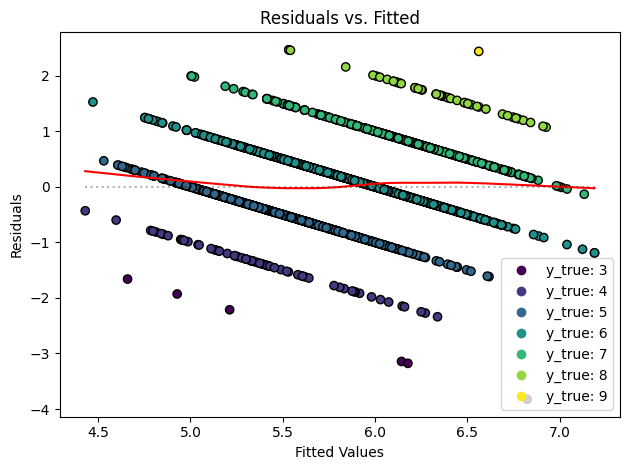

In [15]:
resid_plot(y_test_reg, y_predicted)

## **Simple Linear Regression**: Interaction Effects
In the previous model we only considered the effects of the parameters individually but it may be worth investigating the existence of any interaction effects. An interaction effect exist when the value of an independent variable is dependent on the value of another independent variable. The process will remain the same; we will use normalized data in order to allow comparisons between the models. In order to add interaction effects we use the PolynomialFeatures() function and configure it to only include the linear and interaction terms. Unfortunately, this attempt was unsuccessful since it showed no improvement to the metrics and had an unusual residual plot with some residuals that behaved unexpectedly. To maintain an organized report, we won't be displaying the 67 coefficient esimates since the model is suboptimal and the effects of the estimates are smaller than 1.  

**The performance results are as follows:**
1. **MSE**: 0.5646994392437253
2. **RMSE**: 0.7514648622814811
3. **Mean AE**: 0.5555561330482562
4. **Median AE**: 0.46472536165734146
5. **R-Square**: 0.23679473503387938

In [16]:
%%capture

# get interactions
poly = PolynomialFeatures(degree=2, interaction_only=True)

# fit new data
X_train_interactions = poly.fit_transform(X_train_reg_scaled)
X_test_interactions = poly.fit_transform(X_test_reg_scaled)

model_linear = LinearRegression()
model_linear.fit(X_train_interactions, y_train_reg)

# predictions
y_predicted = model_linear.predict(X_test_interactions)
print_metrics(y_test_reg, y_predicted)

len(model_linear.coef_)
model_linear.coef_

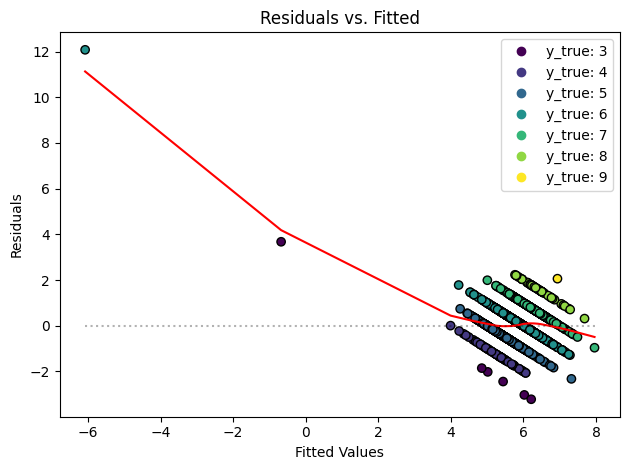

In [17]:
resid_plot(y_test_reg, y_predicted)

## **Polynomial Regression**:
In order to determine whether non-linear relationships exist between the predictors and the quality of the wine, we created a polynomial regression model. Polynomial regression is non-scale-invariant, which means it requires the standardized data we previously calculated. The polynomial factors are created by exponentiating this scaled data up to the fourth degree. For reasons explained below, these models are suboptimal and will not be chosen as our preferred method of giving inference about wine quality.

Upon our analysis we discovered that each of the polynomial models (degree 2, 3, and 4) all performed worse than the simple linear model using the root mean square error and R-Squared as our metrics of interest.  As the degree increased the RMSE also increased, indicating that more complex models were performing worse. We also discovered an unusual result when calculating the R-Squared values; we observed negative values which is unexpected since this metric typically ranges from 0 to 1. Although, after conducting some research, we learnt that negative R-Squared values may occur when the regression line performs worse than a horizontal line about the mean. Even if the RMSE was low and the predictions were accurate, this observation indicates that the underlying relationships shouldn't be trusted as they failed to capture any variance in the response. This shows the importance of consulting multiple metrics when evaluating a model.These results confirm that the relationships are strictly linear and that there is no need to further transform these features.

**Here are the results of interest (some excluded for neatness):**

1. **Quadratic RMSE**:  0.7567444877923833
2. **Cubic RMSE**:   0.8754844509145656
3. **Quartic RMS**E: 3.4942410656779

--

1. **Quadratic RMSE**:  0.22603284007674973
2. **Cubic RMSE**:   -0.035907257136445825
3. **Quartic RMS**E: -15.501739540061475


These assumptions are also validated by using the bias_variance_decomp() function to evaluate the effect of more features on the model's performance. In the first plot for the RMSE vs Features, it shows that when there are at least 17 features, the model begins to overfit to the training data. At this point, the optimistic training performance is worse than the test performance. It shows that the optimal test error occurs when there are approximately 11 features, which is when the model is strictly linear. The second plot for Bias and Variance also confirms this. In this plot we observe that the loss is minimized with 11 featues, which is, once again, the linear model.



In [18]:
%%capture
# scaling to upwards of the 4th degree - any more is overfitting (general rule)
np.random.seed(1)

# scale the training data
X_train_reg_scaled_poly = X_train_reg_scaled.copy()
cols = X_train_reg_scaled_poly.columns # Selecting numeric columns names
for feature_name in cols:
    X_train_reg_scaled_poly[feature_name + "^2"] = X_train_reg_scaled_poly[feature_name] ** 2
    X_train_reg_scaled_poly[feature_name + "^3"] = X_train_reg_scaled_poly[feature_name] ** 3
    X_train_reg_scaled_poly[feature_name + "^4"] = X_train_reg_scaled_poly[feature_name] ** 4

# scale the test data
X_test_reg_scaled_poly = X_test_reg_scaled.copy()
cols = X_test_reg_scaled_poly.columns # Selecting numeric columns names
for feature_name in cols:
    X_test_reg_scaled_poly[feature_name + "^2"] = X_test_reg_scaled_poly[feature_name] ** 2
    X_test_reg_scaled_poly[feature_name + "^3"] = X_test_reg_scaled_poly[feature_name] ** 3
    X_test_reg_scaled_poly[feature_name + "^4"] = X_test_reg_scaled_poly[feature_name] ** 4


# X_train_reg_scaled_poly.head(5)
# X_test_reg_scaled_poly.head(5)

# fit the model
model_poly = LinearRegression()
model_poly.fit(X_train_reg_scaled_poly, y_train_reg);

# evaluate test performance
y_predicted_poly = model_poly.predict(X_test_reg_scaled_poly)
print_metrics(y_test_reg, y_predicted_poly)

In [19]:
%%capture
# investigate if the 3rd degree is any better
np.random.seed(1)

# scale the training data
X_train_reg_scaled_poly = X_train_reg_scaled.copy()
cols = X_train_reg_scaled_poly.columns # Selecting numeric columns names
for feature_name in cols:
    X_train_reg_scaled_poly[feature_name + "^2"] = X_train_reg_scaled_poly[feature_name] ** 2
    X_train_reg_scaled_poly[feature_name + "^3"] = X_train_reg_scaled_poly[feature_name] ** 3

# scale the test data
X_test_reg_scaled_poly = X_test_reg_scaled.copy()
cols = X_test_reg_scaled_poly.columns # Selecting numeric columns names
for feature_name in cols:
    X_test_reg_scaled_poly[feature_name + "^2"] = X_test_reg_scaled_poly[feature_name] ** 2
    X_test_reg_scaled_poly[feature_name + "^3"] = X_test_reg_scaled_poly[feature_name] ** 3


# X_train_reg_scaled_poly.head(5)
# X_test_reg_scaled_poly.head(5)

# fit the model
model_poly = LinearRegression()
model_poly.fit(X_train_reg_scaled_poly, y_train_reg);

# evaluate test performance
y_predicted_poly = model_poly.predict(X_test_reg_scaled_poly)
print_metrics(y_test_reg, y_predicted_poly)

In [20]:
%%capture
# investigate if the 2nd degree is any better
np.random.seed(1)

# scale the training data
X_train_reg_scaled_poly = X_train_reg_scaled.copy()
cols = X_train_reg_scaled_poly.columns # Selecting numeric columns names
for feature_name in cols:
    X_train_reg_scaled_poly[feature_name + "^2"] = X_train_reg_scaled_poly[feature_name] ** 2

# scale the test data
X_test_reg_scaled_poly = X_test_reg_scaled.copy()
cols = X_test_reg_scaled_poly.columns # Selecting numeric columns names
for feature_name in cols:
    X_test_reg_scaled_poly[feature_name + "^2"] = X_test_reg_scaled_poly[feature_name] ** 2


# X_train_reg_scaled_poly.head(5)
# X_test_reg_scaled_poly.head(5)

# fit the model
model_poly = LinearRegression()
model_poly.fit(X_train_reg_scaled_poly, y_train_reg);

# evaluate test performance
y_predicted_poly = model_poly.predict(X_test_reg_scaled_poly)
print_metrics(y_test_reg, y_predicted_poly)

In [21]:
# used to build the tradeoff plots
train_error_vs_N = []
test_error_vs_N = []
loss_vs_N= []
bias_vs_N= []
var_vs_N= []
range_of_num_features = range(1, X_train_reg_scaled_poly.shape[1] + 1)
model_test = LinearRegression()
for N in range_of_num_features:
    np.random.seed(1)
    X_train_first_N_features = X_train_reg_scaled_poly.iloc[:, :N]
    model_test.fit(X_train_first_N_features, y_train_reg)
    train_error_overfit = np.sqrt(sklm.mean_squared_error(y_train_reg, model_test.predict(X_train_first_N_features)))
    train_error_vs_N.append(train_error_overfit)

    X_test_first_N_features = X_test_reg_scaled_poly.iloc[:, :N]
    test_error_overfit = np.sqrt(sklm.mean_squared_error(y_test_reg, model_test.predict(X_test_first_N_features)))
    test_error_vs_N.append(test_error_overfit)

    avg_loss, avg_bias, avg_var = bias_variance_decomp(model_test, X_train_first_N_features.values, y_train_reg.values,
                                                X_test_first_N_features.values, y_test_reg.values, loss='mse',
                                                num_rounds=200, random_seed=1)
    loss_vs_N.append(avg_loss)
    bias_vs_N.append(avg_bias)
    var_vs_N.append(avg_var)

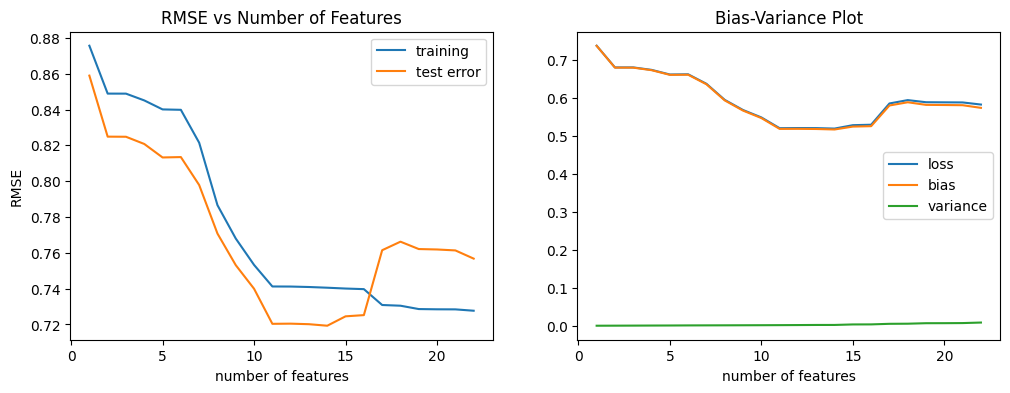

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# first subplot
axes[0].plot(range_of_num_features, train_error_vs_N)
axes[0].plot(range_of_num_features, test_error_vs_N)
axes[0].legend(["training", "test error"])
axes[0].set_title('RMSE vs Number of Features')
axes[0].set_xlabel("number of features")
axes[0].set_ylabel("RMSE")

# second subplot
axes[1].plot(range_of_num_features, loss_vs_N)
axes[1].plot(range_of_num_features, bias_vs_N)
axes[1].plot(range_of_num_features, var_vs_N)
axes[1].legend(["loss", "bias", "variance",])
axes[1].set_title('Bias-Variance Plot')
axes[1].set_xlabel("number of features")

plt.show()

## **Ridge Regression**:
Another type of linear regression is Ridge Regression; it is especially useful when there are many features in the data and more commonly used when these features are correlated. From our EDA above, we discovered minimial correlation between our predictors so it wouldn't hurt to test this algorithm. Ridge regression operates by incorporating the L2 penalty in order to reduce the weights assigned to parameter estimates to prevent overfitting and allow the model to generalize to new data. When the penalty term is 0, the model is plain ordinary least squares, when it is large, the parameter estimates are small, but never zero. Since the model is also non-scale-invariant it is crucial that we used the normalized data.

Through conducting 10-Fold Cross Validation over a wide range of alphas (penalty term), we initially discovered that the range of hyperparameter values used to cross validate excluded the optimal tune. So, through a series of continous testing, we refined our range, producing an optimal alpha of 33.5. This value implies a stronger shrinkage effect of the parameter estimates towards 0. By analyzing the esimated coefficients, we discovered that the Ridge algorithm determined that the most significant factors that contribute to the quality of wine are: volatile acidity, residual sugar, and alcohol. Since the LASSO model examined below has similar characteristics, we will only discuss the interpretations of the significant predictors that are non-overlapping between the two models. The non-overlapping predictor is residual sugar which has a moderately negative relationship with the quality.

Based on the model's estimated coefficients, it seems that residual sugars exert a negative impact on a wine's quality. In order to understand this effect, we researched what residual sugars are and their impact on the wine's quality. We discovered that residual sugars are formed during the winemaking process when yeast converts the sugars into alcohol and carbon dioxide through fermentation. The sugars that are not fermented as known as residual sugars. Depending on the level of sugar within the wine, the flavour and aroma can vary greatly. With more residual sugar, the wine is more sweet, while those with less sugar are more dry. Using this information, we deduced that wine experts, who were tasked with grading these wines, tend to favor a drier wine over those that are sweeter. They may perceive sweeter wines to be poorly fermented and desire something that is more aged. Also, dry wines create better food pairing options while simultaneously being considered healthier due to the lower sugar content. Considering these factors, the model's indication of the negative impact of residual sugars on quality seems plausible, aligning with the beliefs and preferences of sommeliers and wine experts.

Of the models we constructed up to this point, Ridge had a moderate performance which was on-par with that of the linear model. This performance is reaonably accurate but can be improved upon by further increasing the interpretability which can be achieved using LASSO to create sparse models and exclude unnecessary predictors by shrinking them fully to zero.



**The parameter estimates for the scaled data were as follows**:
1. β$_0$: 5.813283483615578
  - The baseline quality of all wines
2. β$_{fixed\_acidity}$: 0.065004
  - For every one unit increase in fixed acidity, quality increases by 0.065
2. β$_{volatile\_acidity}$: -0.217740
  - For every one unit increase in volatile acidity, quality falls by 0.217
4. β$_{residual\_sugar}$:  0.201232
  - For every one unit increase in residual sugars, quality slightly increases by 0.20
5. β$_{citric\_acid}$: -0.012280
  - For every one unit increase in citric acid, quality is barely impacted, falling by 0.01
6. β$_{chlorides}$: -0.010884
  - For every one unit increase in chlorides, quality falls by 0.01
7. β$_{free\_sulfur\_dioxide}$: 0.112866
  - For every one unit increase in free sulfur dioxide, quality increases by 0.112
8. β$_{total\_sulfur\_dioxide}$: -0.152505
  - For every one unit increase in total sulfur dioxide falls by 0.15
9. β$_{density}$: -0.151976
  - For every one unit increase in density, quality drops by 0.151
10. β$_{pH}$: 0.063210
  - For every one unit increase in pH, quality increases by 0.06
11. β$_{sulphates}$: 0.118870
  - For every one unit increase in sulphates, quality increases by 0.118
12. β$_{alcohol}$:   0.321200
  - For every one unit increase in alcohol, quality increases by 0.321

**The performance results are as follows:**
1. **MSE**: 0.5187987517538456
2. **RMSE**: 0.7202768577108705
3. **Mean AE**: 0.5629404040180493
4. **Median AE**: 0.4607385073302175
5. **R-Squared**: 0.29883064993536557

In [23]:
%%capture capture_output
np.random.seed(1)
# cross validation method - 10 fold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# model creation
model_ridge_cv = RidgeCV(alphas=np.arange(15, 50, 0.5), cv=cv)
model_ridge_cv.fit(X_train_reg_scaled, y_train_reg)

# summarize chosen configuration
print(f'alpha: {model_ridge_cv.alpha_}')

# rebuild the model
model_ridge_final = Ridge(alpha=model_ridge_cv.alpha_)
mode_ridge_final_fit = model_ridge_final.fit(X_train_reg_scaled, y_train_reg)

# print coefficients
print(model_ridge_cv.coef_)
print(model_ridge_cv.intercept_)

# predicitons and performance (RMSE)
y_ridge_preds = model_ridge_final.predict(X_test_reg_scaled)
print_metrics(y_test_reg, y_ridge_preds)

pd.Series(index = X_test_reg_scaled.columns, data = model_ridge_final.coef_)
model_ridge_final.intercept_ # 5.813283483615578

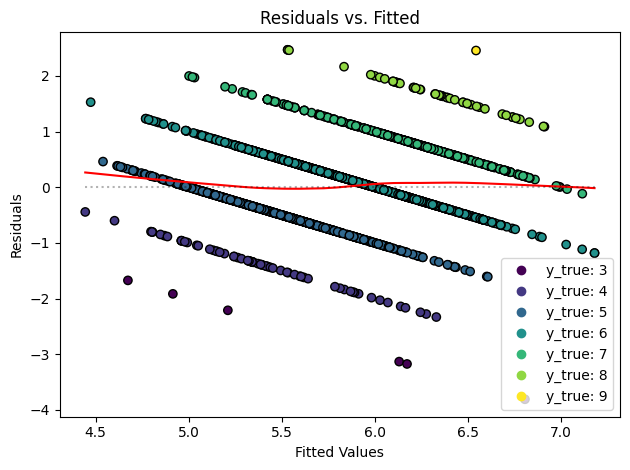

In [24]:
resid_plot(y_test_reg, y_ridge_preds)

## **LASSO Regression**:
The Least Absolute Shrinkage and Selection Operator method (or LASSO) is mainly used to improve the prediction accuracy and interpretability of a statistical model. This is done by putting a penalty on the absolute size of the coefficients and shrinking some coefficients towards zero which reduces the complexity of the model and helps prevent overfitting the model. This method is incorporated to improve on the original linear model and possibly the Ridge model by reducing the dimension space, removing unecessary predictors and enhancing the interpretability. Although, it should be noted that by standardizing the variables impacts the interpretability but doesn't change the relative importance of features.

The LASSO model is also non-scale-invariant and requires the normalized data which we have created. Through conducting cross validation, we discovered that the optimal penalty term was 0.01, indicating that the model suggests something similar to linear regression. This model gave accuracy results which were on-par with that from the first model, further supporting the idea of linear relationships. The algorithm was able to reduce the predictor space from 11 to 9, deciding that "fixed acidity" and "density" aren't relevant in predicting wine quality. Of the parameters it estimated, it seems like those most influential to a wine's quality are "volatile acidity" and "alcohol", having oposing effects. Another residual plot is shown below which also satisfies the primary assumption, although, we still observe large residual values that indicate inaccuracy of the model.

It was decided that for every one unit increase in volatile acidity (on the scaled data) that quality fell by a significant 0.219. Volatile acidity is a measure of the wine's gaseous acids that ocntribute to the smell and taste of vinegar. From this description, it makes sense that the undesirable aroma of vinegar may ruin a tasting experience, thus having negative impacts on the quality. Wine drinkers would rather experience the natural fruit aromas of the wine.

On the otherhand, it seems that alcohol has a significant positive impact on the quality, increasing it by 0.388 for every unit increase of the scaled data. This magnitude displays the overall importance of the feature over the rest. There may be various reasons why more alcohol could improve the quality but by conducting some research we found that it can improve the structure and aroma of the wine. It was read that alcohol contributes to the mouthfeel of the wine; a larger content level increases the viscosity, giving it more texture and making it seem less "watered-down". Alcohol is also resposible for carrying and enhancing aromas and flavours of wine compounds; more alcohol content can bring out more flavours but excessive amounts can detract from the overall quality. For these reasons, it makes sense that alcohol has a positive relationship with the quality.






**The parameter estimates for the scaled data were as follows**:
1. β$_0$: 5.81328348361557
  - The baseline quality of all wines
2. β$_{fixed\_acidity}$: 0
  - Reduced to 0 via LASSO
3. β$_{volatile\_acidity}$: -0.219871
  - For every one unit increase in volatile acidity, quality falls by 0.219
4. β$_{residual\_sugar}$: 0.093278
  - For every one unit increase in residual sugars, quality slightly increases by 0.09
5. β$_{citric\_acid}$: -0.000487
  - For every one unit increase in citric acid, quality is barely impacted, falling by 0.0004
6. β$_{chlorides}$: -0.010371
  - For every one unit increase in chlorides, quality falls by 0.01
7. β$_{free\_sulfur\_dioxide}$: 0.084298
  - For every one unit increase in free sulfur dioxide, quality increases by 0.084
8. β$_{total\_sulfur\_dioxide}$: -0.100320
  - For every one unit increase in total sulfur dioxide falls by 0.1
9. β$_{density}$: 0
  - Reduced to 0 via LASSO
10. β$_{pH}$: 0.017418
  - For every one unit increase in pH, quality increases by 0.01
11. β$_{sulphates}$: 0.088277
  - For every one unit increase in sulphates, quality increases by 0.088
12. β$_{alcohol}$:  0.388395
  - For every one unit increase in alcohol, quality increases by 0.388

**Metrics For Model Evaluation**:
1. **RMSE**: 0.720815635279088
  - On average the predicted values are 0.72 away from the truth. This is pretty accurate.
2. **MSE**: 0.5195751800627951
3. **Mean AE**: 0.5645270975731271
4. **Median AE**: 0.47269872050139794
5. **R-Squared**: 0.2977812878640085


In [25]:
%%capture capture_output
np.random.seed(1)
# cross validation method - 10 fold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# model creation
model_lasso_cv = LassoCV(alphas=np.arange(0.01, 10, 0.01), max_iter=100000, cv=cv)
model_lasso_cv.fit(X_train_reg_scaled, y_train_reg)

# summarize chosen configuration
print(f'alpha: {model_lasso_cv.alpha_}')

# rebuild the model
model_lasso_final = Lasso(alpha=model_lasso_cv.alpha_, max_iter=10000)
mode_lasso_final_fit = model_lasso_final.fit(X_train_reg_scaled, y_train_reg)

# print coefficients
print(model_lasso_cv.coef_)
print(model_lasso_cv.intercept_)

# predicitons and performance (RMSE)
y_lasso_preds = model_lasso_final.predict(X_test_reg_scaled)
print_metrics(y_test_reg, y_lasso_preds)



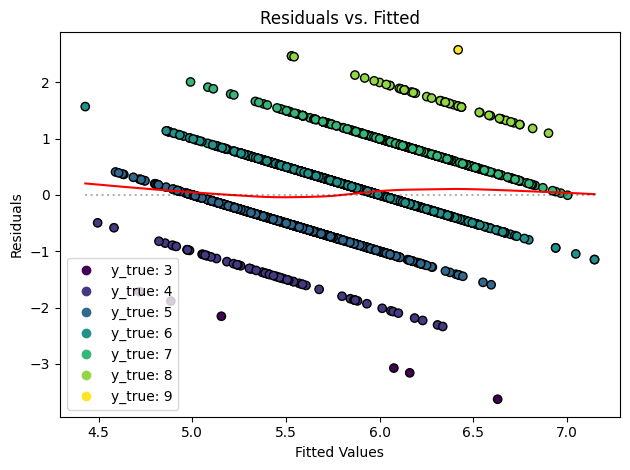

In [26]:
resid_plot(y_test_reg, y_lasso_preds)

## **Ensemble Bagging**: Combined With LASSO

After completing the LASSO model and comparing it to the other simpler models, it was decided that something more complex should be attempted to try and improve the model's prediction accuracy. To maintain consistency, this model is also trained on scaled data despite it being scale-invariant; this is done so allow comparisons against the LASSO model. The Bagging algorithm is a powerful ensemble learning tool which combines the predictions of many classification trees and aggregates their results into a final prediction. This feature makes the algorithm accurate but sacrificing its simplicity and computation speeds.

With this model we get creative and use the sparse model determined by the LASSO algorithm to simplfy the interpretability of an already complex model. To train the model, we perform cross validation on a small set of parameters, using each combination of values. The computational costs of Bagging limit the amount of validation we can perform, so we are limited to 9 possible models.
Through cross-validation, we determined that the optimal parameters for the decision tree was max depth of 6 and 10 maximum leaf nodes; for the bagging portion, 20 trees were suggested to be aggregated. When performing our metric evaluations, we observe another instance of an R-Squared value; for similar reasons as before, this model should not be trusted and will not be used as our primary source of inference.

**Metrics For Model Evaluation**:
1. **RMSE**: 0.5043414499016102
2. **MSE**:  0.7101700147863258
3. **Mean AE**: 0.5677136453550963
4. **Median AE**: 0.46470866620049645
5. **R-Squared**: -1.7423074966899597


In [28]:
%%capture
np.random.seed(1)

# reduced set - its the scaled data but the naming prefix would be too long
sparse_X_train = X_train_reg_scaled.loc[:,["volatile acidity",
                                           "residual sugar",
                                           "citric acid",
                                           "chlorides",
                                           "free sulfur dioxide",
                                           "total sulfur dioxide",
                                           "pH", "sulphates","alcohol"]]

sparse_X_test = X_test_reg_scaled.loc[:,["volatile acidity",
                                           "residual sugar",
                                           "citric acid",
                                           "chlorides",
                                           "free sulfur dioxide",
                                           "total sulfur dioxide",
                                           "pH", "sulphates","alcohol"]]

# grid - the second controls the depth of the decision tree!
param_grid = {
    'n_estimators': [10,13,16,20,],
    'estimator__max_depth': [5,6,7,8,9,10],
    'estimator__max_leaf_nodes': [5,6,7,8,9,10]
}

# base model
estimator = DecisionTreeRegressor()

# bagging regressor with minimal parameters (to tune)
bagging_regressor = BaggingRegressor(estimator=estimator, random_state=1)

# grid search for cv over all combos of parameters above
grid_search = GridSearchCV(bagging_regressor, param_grid, cv=5)
grid_search.fit(sparse_X_train, y_train_reg)

# Print the best parameters
print("Best parameters:", grid_search.best_params_) #depth: none, est: 30

# refit final model
estimator = DecisionTreeRegressor(max_depth = 6, max_leaf_nodes = 10)
bagging_regressor_final = BaggingRegressor(estimator=estimator, n_estimators = 20, random_state=1)
bagging_regressor_final.fit(sparse_X_train, y_train_reg)

preds = bagging_regressor_final.predict(sparse_X_test)
print_metrics(preds, y_test_reg)


## **Support Vector Machine Regression**: Combined With LASSO
Another attempt would be to try using support vector machines to perform regression that is more complex and much less interpretable. In combination with the SVM, we will train it on the sparse data once again. The algorithm is reliant on two main parameters, the kernal and epsilon. The kernel is typically linear, polynomial, or radial and is used to transform the data to prepare it to be fit by a hyperplane. The epsilon is used to control the margins around this hyperplane, specifying the number of data points which you are willing to have occur outside of the margins. SVM regression aims to maximize the observations within these margins and minimize those outside of them. Once again we will use the LASSO-reduced model. This algorithm is extremely intensive and takes very long to complete, as a result we are limited in the tuning process. As a result, it is likely that we didn't discover the optimal tuning for the model, thus making this method less accurate than the others.
Despite this, through the tuning process it was discovered that the optimal parameters were: C = 0.01 and epsilon = 0.1 while using a linear kernel. When performing our metric evaluations, we observe another instance of an R-Squared value; for similar reasons as before, this model should not be trusted and will not be used as our primary source of inference.

**Metrics For Model Evalutation:**
1. **MSE**: 0.5232558953598501
2. **RMSE**: 0.7233642895248908
3. **Mean AE**: 0.5635914885142439
4. **Median AE**: 0.4569119063936875
5. **R-Squared**: -1.3250843927288214

In [29]:
%%capture
# this takes very long to run - fix this
np.random.seed(1)

# hyperparameters
cost_values = np.linspace(0.01, 10, 10)
kernel_values = ['linear']
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# svm classifier
svm_classifier = SVR()

# parameter grid
param_grid = {'C': cost_values, 'kernel': kernel_values, "epsilon": epsilon_values}

# grid search object
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=cv)
grid_search.fit(sparse_X_train, y_train_reg)

print("Best parameters:", grid_search.best_params_) #{'C': 0.01, 'epsilon': 0.1, 'kernel': 'linear'}


In [30]:
%%capture

svm_reg = SVR(C = 0.01, epsilon = 0.1, kernel = "linear")
svm_reg.fit(X_train_reg_scaled, y_train_reg)
preds = svm_reg.predict(X_test_reg_scaled)
print_metrics(preds, y_test_reg)

# the predictions are accurate but the underlying relationships shouldn't be trusted
# as they have been shown to not capture any variance in the response, performing
# worse than a horizontal line about the mean.

## **Regression Conclusion**: Chosen Model - LASSO
After building the polynomial, bagging, and support vector machine models, it seemed that complex models perform poorly on this data. These assumptions were deduced by observing their negative R-Squared scores. Although their RMSE may have been low, this metric indicates that the models shouldn't be trusted since they failed to capture any variance within the response variable. This occurence showcases the importance of consulting many metrics when building models. These odd results could be possible due to the models essentially getting lucky with their predictions without determining any significant relationship between the predictors and response variable. With these findings, it lead us to believe that the solution lays in a simpler model.

Among all our attempts, the less complex and more interpretable models, namely linear regression, Ridge regression, and Lasso regression, performed the best. They all had comparable metrics and coefficient estimations.When deciding which of these three models to use, we considered the bias-variance tradeoff. Given that all three have high interpretability and low complexity, we decided that Lasso regression was the simplest and most interpretable due to its sparsity-defining feature. It reduced the predictor space from 11 to 9 variables, making it more interpretable than the other models. Despite incorporating various forms of feature engineering and a range of interpretable and complex algorithms in our model-building attempts, we couldn’t construct a model that outperformed Lasso regression. However, this isn’t a setback. In fact, it’s a success due to the interpretations and inferences we are able to conclude about the population.

To reiterate the LASSO model’s findings, it was determined that volatile acidity and alcohol content were the most influential factors in determining a wine’s quality. For every unit increase in the scaled volatile acidity measurement, the quality decreased by about 0.219. This suggests that the gaseous acids, which contribute to the smell and taste of vinegar in wine, indeed have a negative impact on the quality.On the otherhand, the model suggested that for every unit increase in the scaled alcohol content measurement, the quality would increase by approximately 0.388. From our own research, we found that alcohol enhances the aromas and flavors of wine compounds. As the alcohol content increases, it can bring out more flavors and significantly improve the tasting experience.Based on this information, it’s reasonable to infer that alcohol has a positive impact on a wine’s quality.

This concludes our regression analysis aimed at identifying the features that significantly predict a wine’s quality. As mentioned in our research purpose statement, we were able to effectively pinpoint the key features, volatile acidity and alcohol content, that have the most substantial impact on a wine’s quality. With this model, the need for a sommelier or extensive wine tasting experience to distinguish between high and low-quality wines is eliminated. Instead, all that’s required is knowledge of the wine’s composition. However, it’s important to note that these ratings are based on the assessments of wine experts and may not align with the tastes of non-experts due to differences in palates. Thus, this process was successful in identifying wines that experts consider to be of high quality, not necessarily those that would be preferred by the average individual.

**Metric Comparison**:
1. **OLS RMSE**: 0.7203339536422945
2. **OLS R-Square**: 0.2987194829488602

--

1. **LASSO RMSE**: 0.720815635279088
2. **LASSO R-Squared**: 0.2977812878640085

--

1. **Ridge RMSE**: 0.7202768577108705
2. **Ridge R-Squared**: 0.29883064993536557


## **Boostrap Distribution**: Parameter Estimates
Prior to introducing our classification problem, it is important to construct a confidence interval for the key features within our chosen LASSO model. This allows us to get a better understanding of the true effect of our parameters through continued resampling. Determining the distribution using bootstrapping is extremely intensive, as a result we had to use fewer bootstrap samples to estimate the distributions. Using LASSO as the model of interest, the distributions are shown below; most of them are approximately normally distributed. Although, we are primarily interested in the features which were determined to have the greatest impact, volatile acidity (B2) and alcohol (B11).  It seems that each LASSO model behaved similarly when predicting these estimates, allowing us to produce these 95% confidence intervals:

1. **volatile acidity**: (-0.24651132632588407, -0.1945859545830623)
2. **alcohol**: (0.3573109543437318, 0.4129051493630468)

In [31]:
def simple_resample(n):
    """
    Args:
        n: an integer

    Returns:
        an array of length n of a random sample with replacement of
        the integers 0, 1, ..., n-1
    """
    return np.random.randint(low=0, high=n, size=n)

In [32]:
def bootstrap(boot_pop, statistic, resample, replicates = 1000):
    """
    Args:
        boot_pop: an array of shape n x d.
        statistic: a function which takes boot_pop and returns a number or array (in the case where we are estimating multiple parameters at once).
        resample: a function which takes n and returns a random sample from the integers [0, n)
        replicates: the number of resamples

    Returns:
        an array of length replicates, each entry being the statistic computed on a bootstrap sample of the data.
    """
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return resample_estimates

In [33]:
def eleven_parameter_estimator(d):
    """
    Returns:
        The optimal theta that minimizes average squared loss for this dataset and model
    """

    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)

    # model creation
    model_lasso_cv = LassoCV(alphas=np.arange(0.01, 10, 0.01), max_iter=100000, cv=cv)
    model_lasso_cv.fit(d[:,:11], d[:,11])

    return np.append(model_lasso_cv.intercept_, model_lasso_cv.coef_)

scaled_data = pd.concat([X_train_reg_scaled, pd.DataFrame(y_train_reg)], axis=1)
d = np.array(scaled_data)
data = eleven_parameter_estimator(d)

In [34]:
# bootstrap!
bootstrap_multiple = bootstrap(d, eleven_parameter_estimator, simple_resample, replicates = 1000)

In [ ]:
%%capture
# 95% CI for alcohol (B11), volatile acidity (B2)

# volatile acidity
left_endpt = np.percentile(bootstrap_multiple[:, 2], 2.5) # SOLUTION
right_endpt = np.percentile(bootstrap_multiple[:, 2], 97.5) # SOLUTION

left_endpt, right_endpt # (-0.24651132632588407, -0.1945859545830623)

# alcohol
left_endpt = np.percentile(bootstrap_multiple[:, 11], 2.5) # SOLUTION
right_endpt = np.percentile(bootstrap_multiple[:, 11], 97.5) # SOLUTION

left_endpt, right_endpt # (0.3573109543437318, 0.4129051493630468)

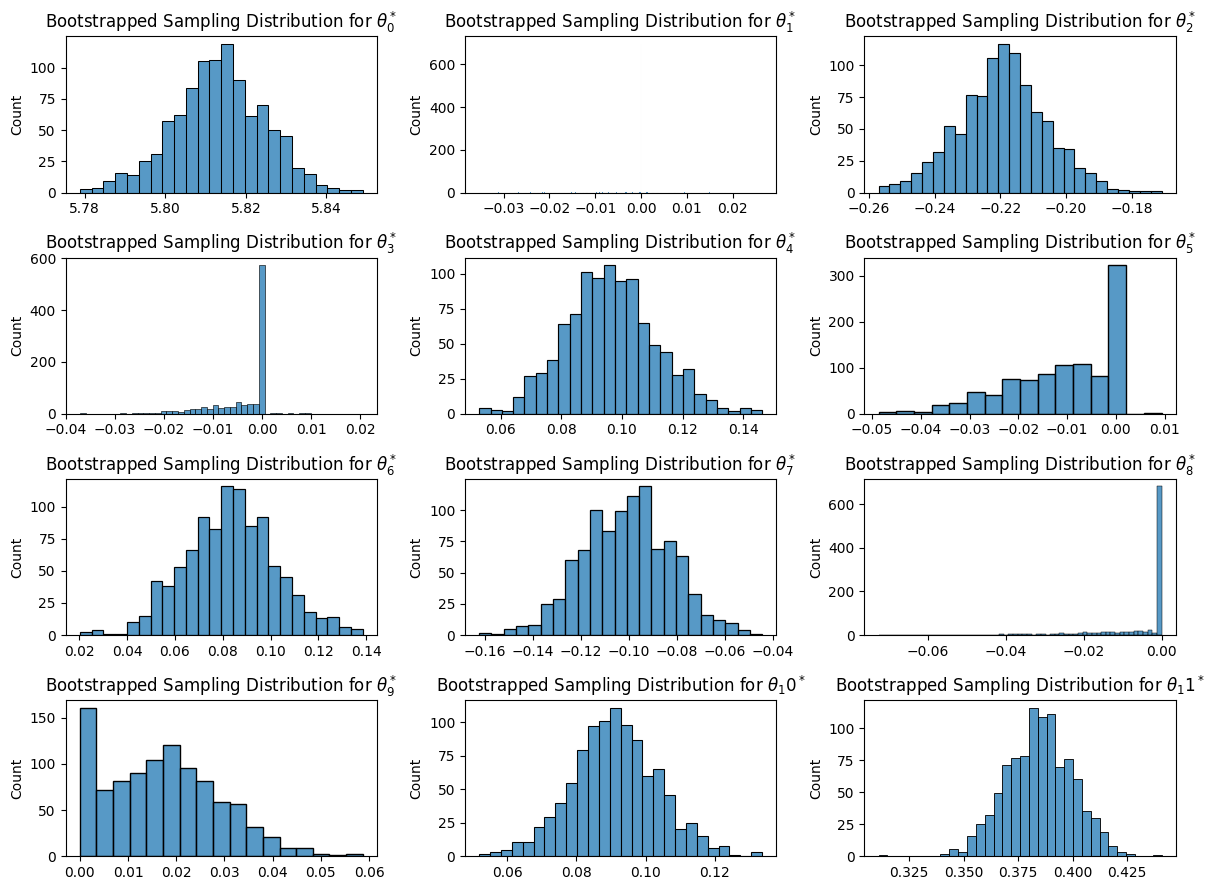

In [ ]:
f, axs = plt.subplots(4,3,figsize=(12, 9))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    plt.title(r'Bootstrapped Sampling Distribution for $\theta_{}^*$'.format(i))
    sns.histplot(bootstrap_multiple[:, i])
    plt.tight_layout()



---



# **Classification**: Predicting Wine Type
In this section we build multiple classification models to attempt to predict the wine type as either red or white. To achieve this, we make use of logistic classification and decision tree models. To get creative, we decided to use principal component analysis to project our data onto the first principal components and use this new data to develop a new logistic model. To evaluate these models, we primarily observed the accuracy scores as well some other metrics within the confusion matrix.

## **Logistic Classification:**

Since we are interested in 2 wine types, red and white, this classification task is identified as binary logistic classification. It typically uses logistic regression to estimate the probability that an observation belongs to a specific class, in this case, red or white. The model will then classify the observation using the calculated probability, assigning it to the class which is more likely.

To construct our logistical model for predicting the wine type, we use 10-fold cross-validation to ensure that our training model does not overfit or underfit the data. The cross validation will take the average error with our Cs being the the hyperparameter in this situation. The Cs represent the inverse of a regularization constant which can typically be depicted as alpha.

After fitting the cross-validated model with a L1 penalty (LASSO), only one feature was squeezed to zero which leaves us with 10 significant predictor variables in the model.

The model returned a test accuracy of 99% which is phenomenal however, there are some diagnostic checks that we have to review before confirming a seemingly excellent model. Using a confusion matrix, we want to see the distribution of predicted and actual labels. We also created a normalized confusion matrix that calculates the recall and true negative rate. This graph demonstrated to us that the positive and negative sides were not neglected within our model because the recall and true negative rate are 99% and 98% respectively. This indicates a truly effective model which we can rely on for determining the correct wine type.

**The coefficients for L1 logistical regression were as follows**:
1. β$_{fixed\_acidity}$: 0.0
  - This fixed acidity is zero because the L1 penalty deemed it insignificant
2. β$_{volatile\_acidity}$: -1.176484
  - For every one unit increase in volatile acidity, the average of red wine's log odds falls by 1.176484
3. β$_{citric\_acid}$: 0.290491
  - For every one unit increase in citric acid, the average of red wine's log odds rises by 0.290491
4. β$_{residual\_sugar}$: 3.963794
  - For every one unit increase in residual sugars, the average of red wine's log odds rises by 3.963794
5. β$_{chlorides}$: -0.819758
  - For every one unit increase in chlorides, the average of red wine's log odds falls by 0.819758
6. β$_{free\_sulfur\_dioxide}$: -0.984630
  - For every one unit increase in free sulfur dioxide, the average of red wine's log odds falls by 0.984630
7. β$_{total\_sulfur\_dioxide}$: 3.247276
  - For every one unit increase in total sulfur dioxide, the average of red wine's log odds rises by 3.247276
8. β$_{density}$: -4.141983
  - For every one unit increase in density, the average of red wine's log odds falls by 4.141983
9. β$_{pH}$: -0.053745
  - For every one unit increase in pH, the average of red wine's log odds falls by 0.053745
10. β$_{sulphates}$:  -0.787953
  - For every one unit increase in sulphates, the average of red wine's log odds falls by 0.787953
11. β$_{alcohol}$: -1.510261
  - For every one unit increase in alcohol, the average of red wine's log odds falls by 1.510261

In [35]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model_logi_cv = LogisticRegressionCV(Cs=np.arange(0.01, 10, 0.01), max_iter=100000,solver = 'liblinear', cv=cv, penalty = "l1")

model_logi_cv.fit(X_train_class_scaled, y_train_class)

logi_pred = model_logi_cv.predict(X_test_class_scaled)
print(f'Logistical Regression Accuracy: {sklm.accuracy_score(y_test_class, logi_pred)}')

Logistical Regression Accuracy: 0.9907692307692307


Confusion matrix, without normalization
[[ 453    9]
 [   9 1479]]
Normalized confusion matrix
[[0.98051948 0.01948052]
 [0.00604839 0.99395161]]


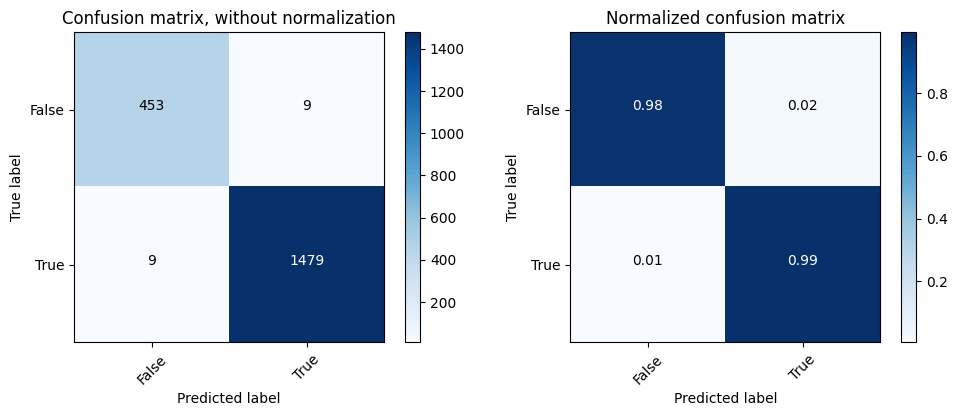

In [ ]:
# this one plots them side by side
confusion_matrix = sklm.confusion_matrix(y_test_class, logi_pred)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['False', 'True']

# Create a new figure
plt.figure(figsize=(10, 4))

# Non-normalized plot confusion matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.grid(False)
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Normalized Plot confusion matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.grid(False)
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.tight_layout()
plt.show()

## **Logistic Regression:** First Two Principal Components

Principal component analysis is an unsupervised learning algorithm which is especially useful for dimensionality reduction of the k-feature space. It operates by determining k orthogonal directions of maximum variance which are calculated as linear combinations of the k features.
More significant components are identified first, where the direction of greatest variance is assigned as the first principal component; each subsequent direction contains less variance than the previous, but more than the following component.

In this attempt we will use PCA to reduce the dimensionality from 11 features to 2. This decision allows us to simplify the issue at hand as we are now able to visualize our features on a 2-D plane. Since the first 2 principal components capture the most variation, we decided to project our data onto these components. The plot of the first two components shows that there is a clear distinction between the two principal components. The plot shows minimal overlap, which means that a linear decision boundary can be placed in between the clearly defined clusters. With these new features we will fit another logistical model to judge whether or not the loss of variance in the explanatory variables will be justified with the increase in interpretability and prediction accuracy.

To construct the model, "lbfgs" was used as the value for the argument solver. This was the best option for the model because "lbfgs" performs best with smaller datasets like the wine dataset in use. This solver value is also recommended for logistical regression models that use L2 penalty or no penalty and we decided that including a penalty is not necessary due to the dimensionality reduction of PCA. Upon evalation, the accuracy was determined to be 98% which tells us that the model is near perfect when predicting wine types however, it is not better than the original logistic regression at 99% test accuracy.

In [ ]:
fit_pca = PCA(n_components=2)

In [ ]:
X_train_pca = fit_pca.fit_transform(X_train_class_scaled)
X_test_pca = fit_pca.transform(X_test_class_scaled)

In [ ]:
lr = LogisticRegression(fit_intercept=True, solver = 'lbfgs')

# fitting the model
lr.fit(X_train_pca, y_train_class)
logi_pca_pred = lr.predict(X_test_pca)

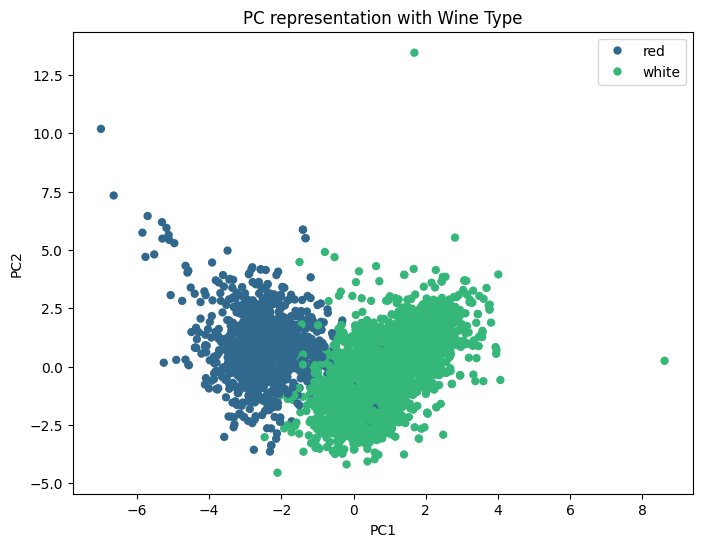

In [ ]:
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.scatterplot(x=X_train_pca[:,0],y=X_train_pca[:,1] ,hue=y_train_class, palette='viridis', legend='brief', edgecolor='none')  # Plot the scatter plot
plt.title('PC representation with Wine Type')  # Set the title of the plot
plt.xlabel('PC1')  # Label for the x-axis
plt.ylabel('PC2')  # Label for the y-axis
plt.legend()  # Display legend
plt.show()

Confusion matrix, without normalization
[[ 446   16]
 [  19 1469]]
Normalized confusion matrix
[[0.96536797 0.03463203]
 [0.01276882 0.98723118]]


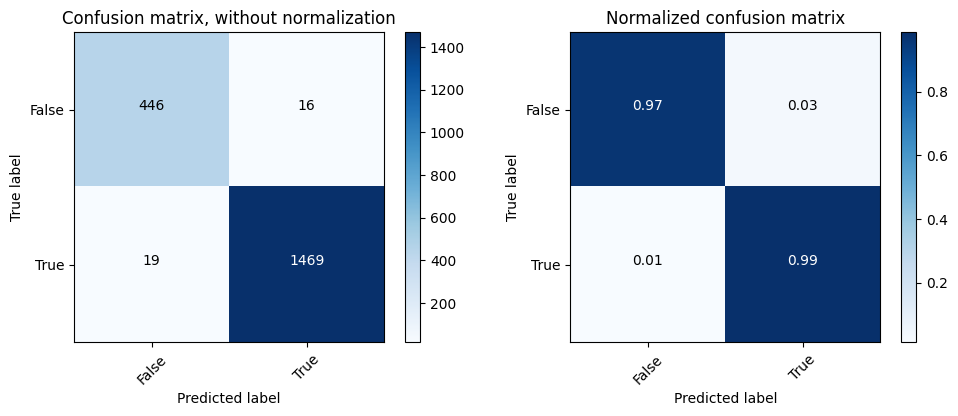

In [ ]:
confusion_matrix_lr2 = sklm.confusion_matrix(y_test_class, logi_pca_pred)
class_names = ['False', 'True']

# Create a new figure
plt.figure(figsize=(10, 4))

# Non-normalized plot confusion matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.grid(False)
plot_confusion_matrix(confusion_matrix_lr2, classes=class_names,
                      title='Confusion matrix, without normalization')

# Normalized Plot confusion matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.grid(False)
plot_confusion_matrix(confusion_matrix_lr2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.tight_layout()
plt.show()

In [ ]:
print(f'Logistical Regression with 2 PC - Accuracy: {sklm.accuracy_score(y_test_class, logi_pca_pred)}')

Logistical Regression with 2 PC - Accuracy: 0.982051282051282


## **Decision Tree**:

The final model we used for the classification of wine types is a decision tree. They operate by splitting the data into subsets based on different conditions. These splits form a tree shape with decision nodes (where conditions are checked) and leaf nodes (where observations are classified). From a more abstract angle, a decision tree will make divisions in the data that are perpendicular to the corresponding variable's axis. These cuts will create spaces for which we will be able to predict if a bottle of wine is red or white. Due to the distinction of the specific decisions and entropy scores, this method is highly interpretable since the analyst is able to visualize exactly how the data is classified.

Before we fit the model we used the subset selection from the original logistical regression that eliminated fixed acidity using L1 norm penalty. The next step was to prune the decision tree to mitigate the potential of overfitting. This involved creating a reasonable maximum depth of the tree and after a few trial and error fittings, we decided that a depth of 3 was ideal.

The accuracy was found to be about 97%, slightly worse than the previous models accuracy.

In [ ]:
X_train_class_tree = X_train_class_scaled.iloc[:,1:]
X_test_class_tree = X_test_class_scaled.iloc[:,1:]

In [ ]:
# Create Decision Tree classifer object
prune_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
prune_tree = prune_tree.fit(X_train_class_tree,y_train_class)

#Predict the response for test dataset
y_pred = prune_tree.predict(X_test_class_tree)

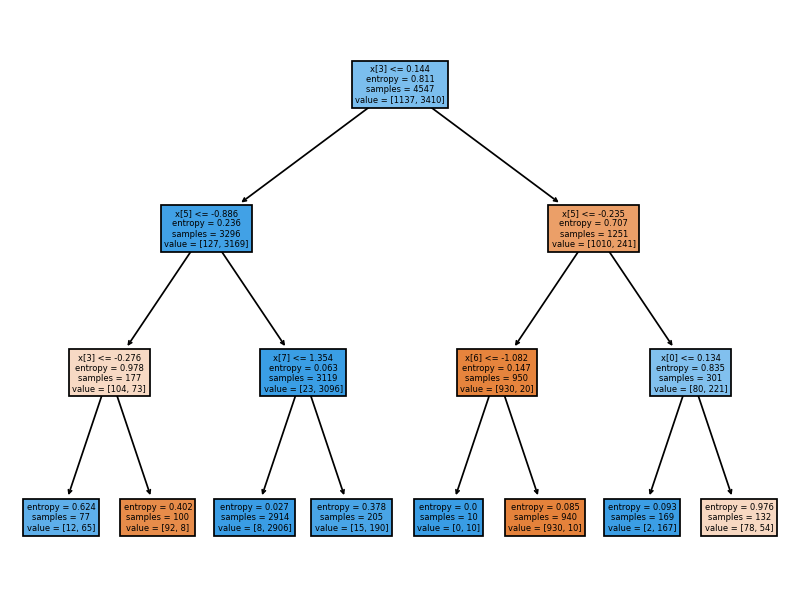

In [ ]:
# Visualizing Decision Trees
plt.figure(figsize=(8, 6), dpi=125)
plot_tree(prune_tree, filled=True)
plt.show()

Confusion matrix, without normalization
[[ 443   19]
 [  33 1455]]
Normalized confusion matrix
[[0.95887446 0.04112554]
 [0.02217742 0.97782258]]


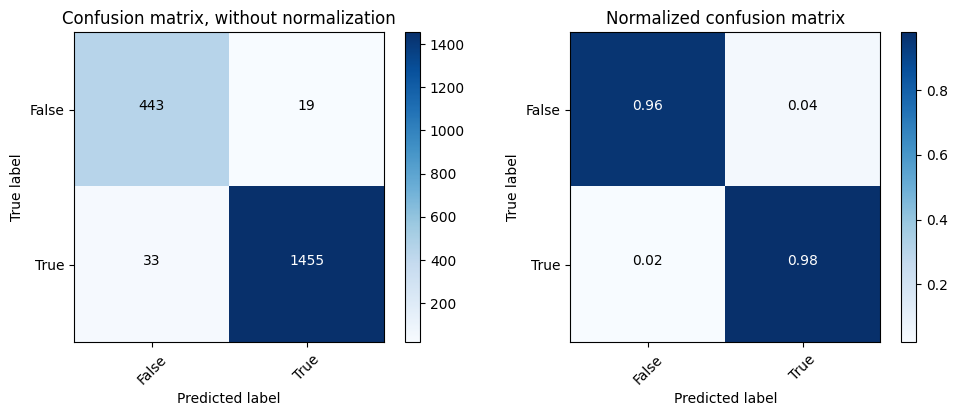

In [ ]:
confusion_matrix_tree = sklm.confusion_matrix(y_test_class, y_pred)
class_names = ['False', 'True']

# Create a new figure
plt.figure(figsize=(10, 4))

# Non-normalized plot confusion matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.grid(False)
plot_confusion_matrix(confusion_matrix_tree, classes=class_names,
                      title='Confusion matrix, without normalization')

# Normalized Plot confusion matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.grid(False)
plot_confusion_matrix(confusion_matrix_tree, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Model Accuracy
print("Decision Tree - Accuracy:", sklm.accuracy_score(y_test_class, y_pred))

Decision Tree - Accuracy: 0.9733333333333334


# **Classification Conclusion:**

The three models to predict wine type are logistical regression with an L1 penalty, logistical regression with PCA, and pruned decision tree. All three of these models had an extremely high test accuracy however, interpretability in a model can be extremely useful. In the case of predicting wine types, the intuitiveness and interpretability of models don't have such importance because the details under the hood of the model don't matter as long as the result is significant. Therefore, the most significant model for predicting wine type is the logistical regression with an L1 penalty and an accuracy of 99%.

Given the extremely high test accuracy of the L1 logistical regression model, we believe that it has the potential to outperform the majority of sommeliers in predicting wine types. There will always be sommeliers that will be unsure about certain features that they are tasting however, the data of certain kinds of wine will never be uncertain. In the end, the 99% accuracy proves that a logistical regression model can predict to a similar degree that of a sommelier. This satisfies our research purpose as we have demonstrated our ability to outperform the wine experts at wine classification.



---



# **Conclusion:**
Throughout this report we aimed to train models which were able to match a sommelier's efficiency and accuracy at quantifying a wine's value while also being able to distinguish its type as red or white. To achieve this, we combined both supervised and unsupervised learning methods while also considering the trade-off between interpretability and accuracy.

Our process to use regression techniques to predict the quality score of a wine made use of a variety of models with varying levels of complexity. We incorporated multiple linear regression, polynomial regression, LASSO, Ridge, support vector machines,and bagging to attempt to understand the relationship between the components of a wine and its quality. After this long process, the simpler models outperformed the complex models. From these models, we concluded that LASSO was the most optimal due to its interpretability through reducing the domain space. This model suggested that alcohol (0.388) and volatile acidity (-0.219) had the largest impact on a wine's quality. After doing some research, we were able to provide in-depth inferences as to why these features may be so influential. We found that alcohol enhances the aromas and flavors of wine compounds so an increased amount will create a better tasting experience, thus improving the quality. Furthermore, since volatile acids contribute to the smell and taste of vinegar in wine, it is reasonable to believe that a higher concentration of this component will ruin the flavours and overall quality. With the LASSO model, we satisified our research goal since we no longer require the knowledge and experience of a sommelier to quantify a wine's quality, all we need is our model and chemical composition of the wine.


In using classification techniques to predict the type of wine, we incorporated a wide range of tools to match the precision of sommeliers. We included and combined models such as logistical regression, LASSO, PCA, and decision trees, to predict wine types with complex predictor variables. We started our research with the goal of achieving the best accuracy however, we quickly realized that interpretability of classifying different wines is also beneficial to outperforming a sommelier. With that in mind, the best model is the logistical regression with L1 penalty. The LASSO based penalty gave us the insight that it was a correlated predictor variable with minimal sighnificance to the model therefore, it helps with further understanding the model on an intuitive level. The other portion of the criteria that the logistic regression satisfied was the 99% test accuracy. This near perfection statistic demonstrates that the model can certainly better predict wine type than a vast majority of sommeliers.


